In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/ds_salaries.csv',index_col=0)

In [3]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [4]:
descriptive_stats = data.describe()
print(descriptive_stats)

         work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.692133  1.544357e+06   70957.259411      40.70913
min    2020.000000  4.000000e+03    2859.000000       0.00000
25%    2021.000000  7.000000e+04   62726.000000      50.00000
50%    2022.000000  1.150000e+05  101570.000000     100.00000
75%    2022.000000  1.650000e+05  150000.000000     100.00000
max    2022.000000  3.040000e+07  600000.000000     100.00000


# Descriptive Statistics

Describe the numerical variables

In [5]:
numericals = data.select_dtypes(np.number)
numericals

,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,,,,
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
602,2022,154000,154000,100
603,2022,126000,126000,100
604,2022,129000,129000,0


Describe the categorical variables

In [6]:
categoricals=[column for column in data.columns if (data[column].dtype==object)] 
categoricals

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [7]:
correlation_matrix = numericals.corr()
print(correlation_matrix)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.087577       0.170493      0.076314
salary         -0.087577  1.000000      -0.083906     -0.014608
salary_in_usd   0.170493 -0.083906       1.000000      0.132122
remote_ratio    0.076314 -0.014608       0.132122      1.000000


In [8]:
import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(a=numericals['salary'], popmean=310)

Ttest_1sampResult(statistic=5.163876824690969, pvalue=3.2855154835108305e-07)

In [9]:
import matplotlib.pyplot as plt

# Calculate mean and median salary
mean_salary = data['salary'].mean()
median_salary = data['salary'].median()
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")

Mean Salary: 324000.0626029654
Median Salary: 115000.0


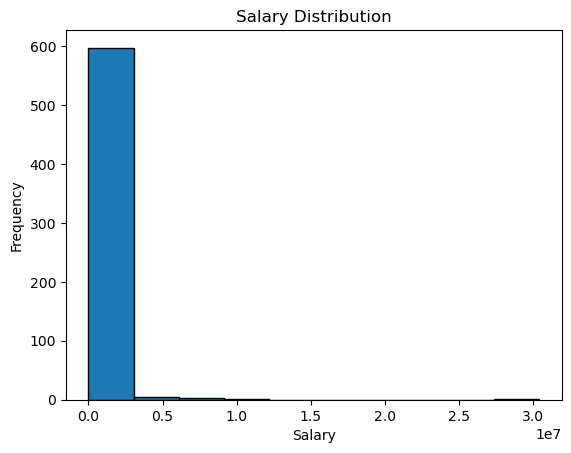

In [10]:
# Create a histogram of salary
plt.hist(data['salary'], bins=10, edgecolor='k')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

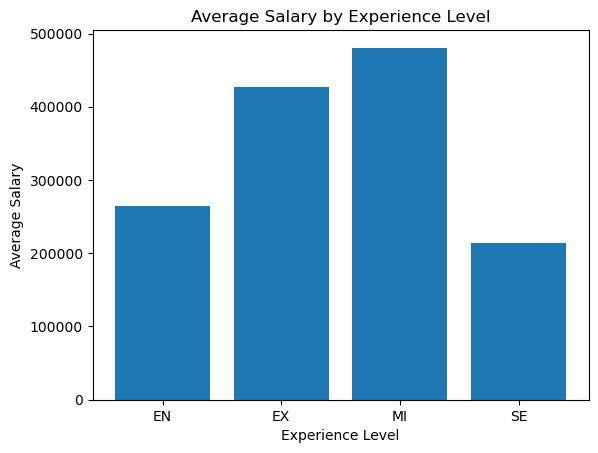

In [20]:
# Create a bar plot of average salary by experience level
avg_salary_by_level = data.groupby('experience_level')['salary'].mean()
plt.bar(avg_salary_by_level.index, avg_salary_by_level)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience Level')
plt.show()


# EDA : Exploratory data analysis

Check the numerical variable normality visually

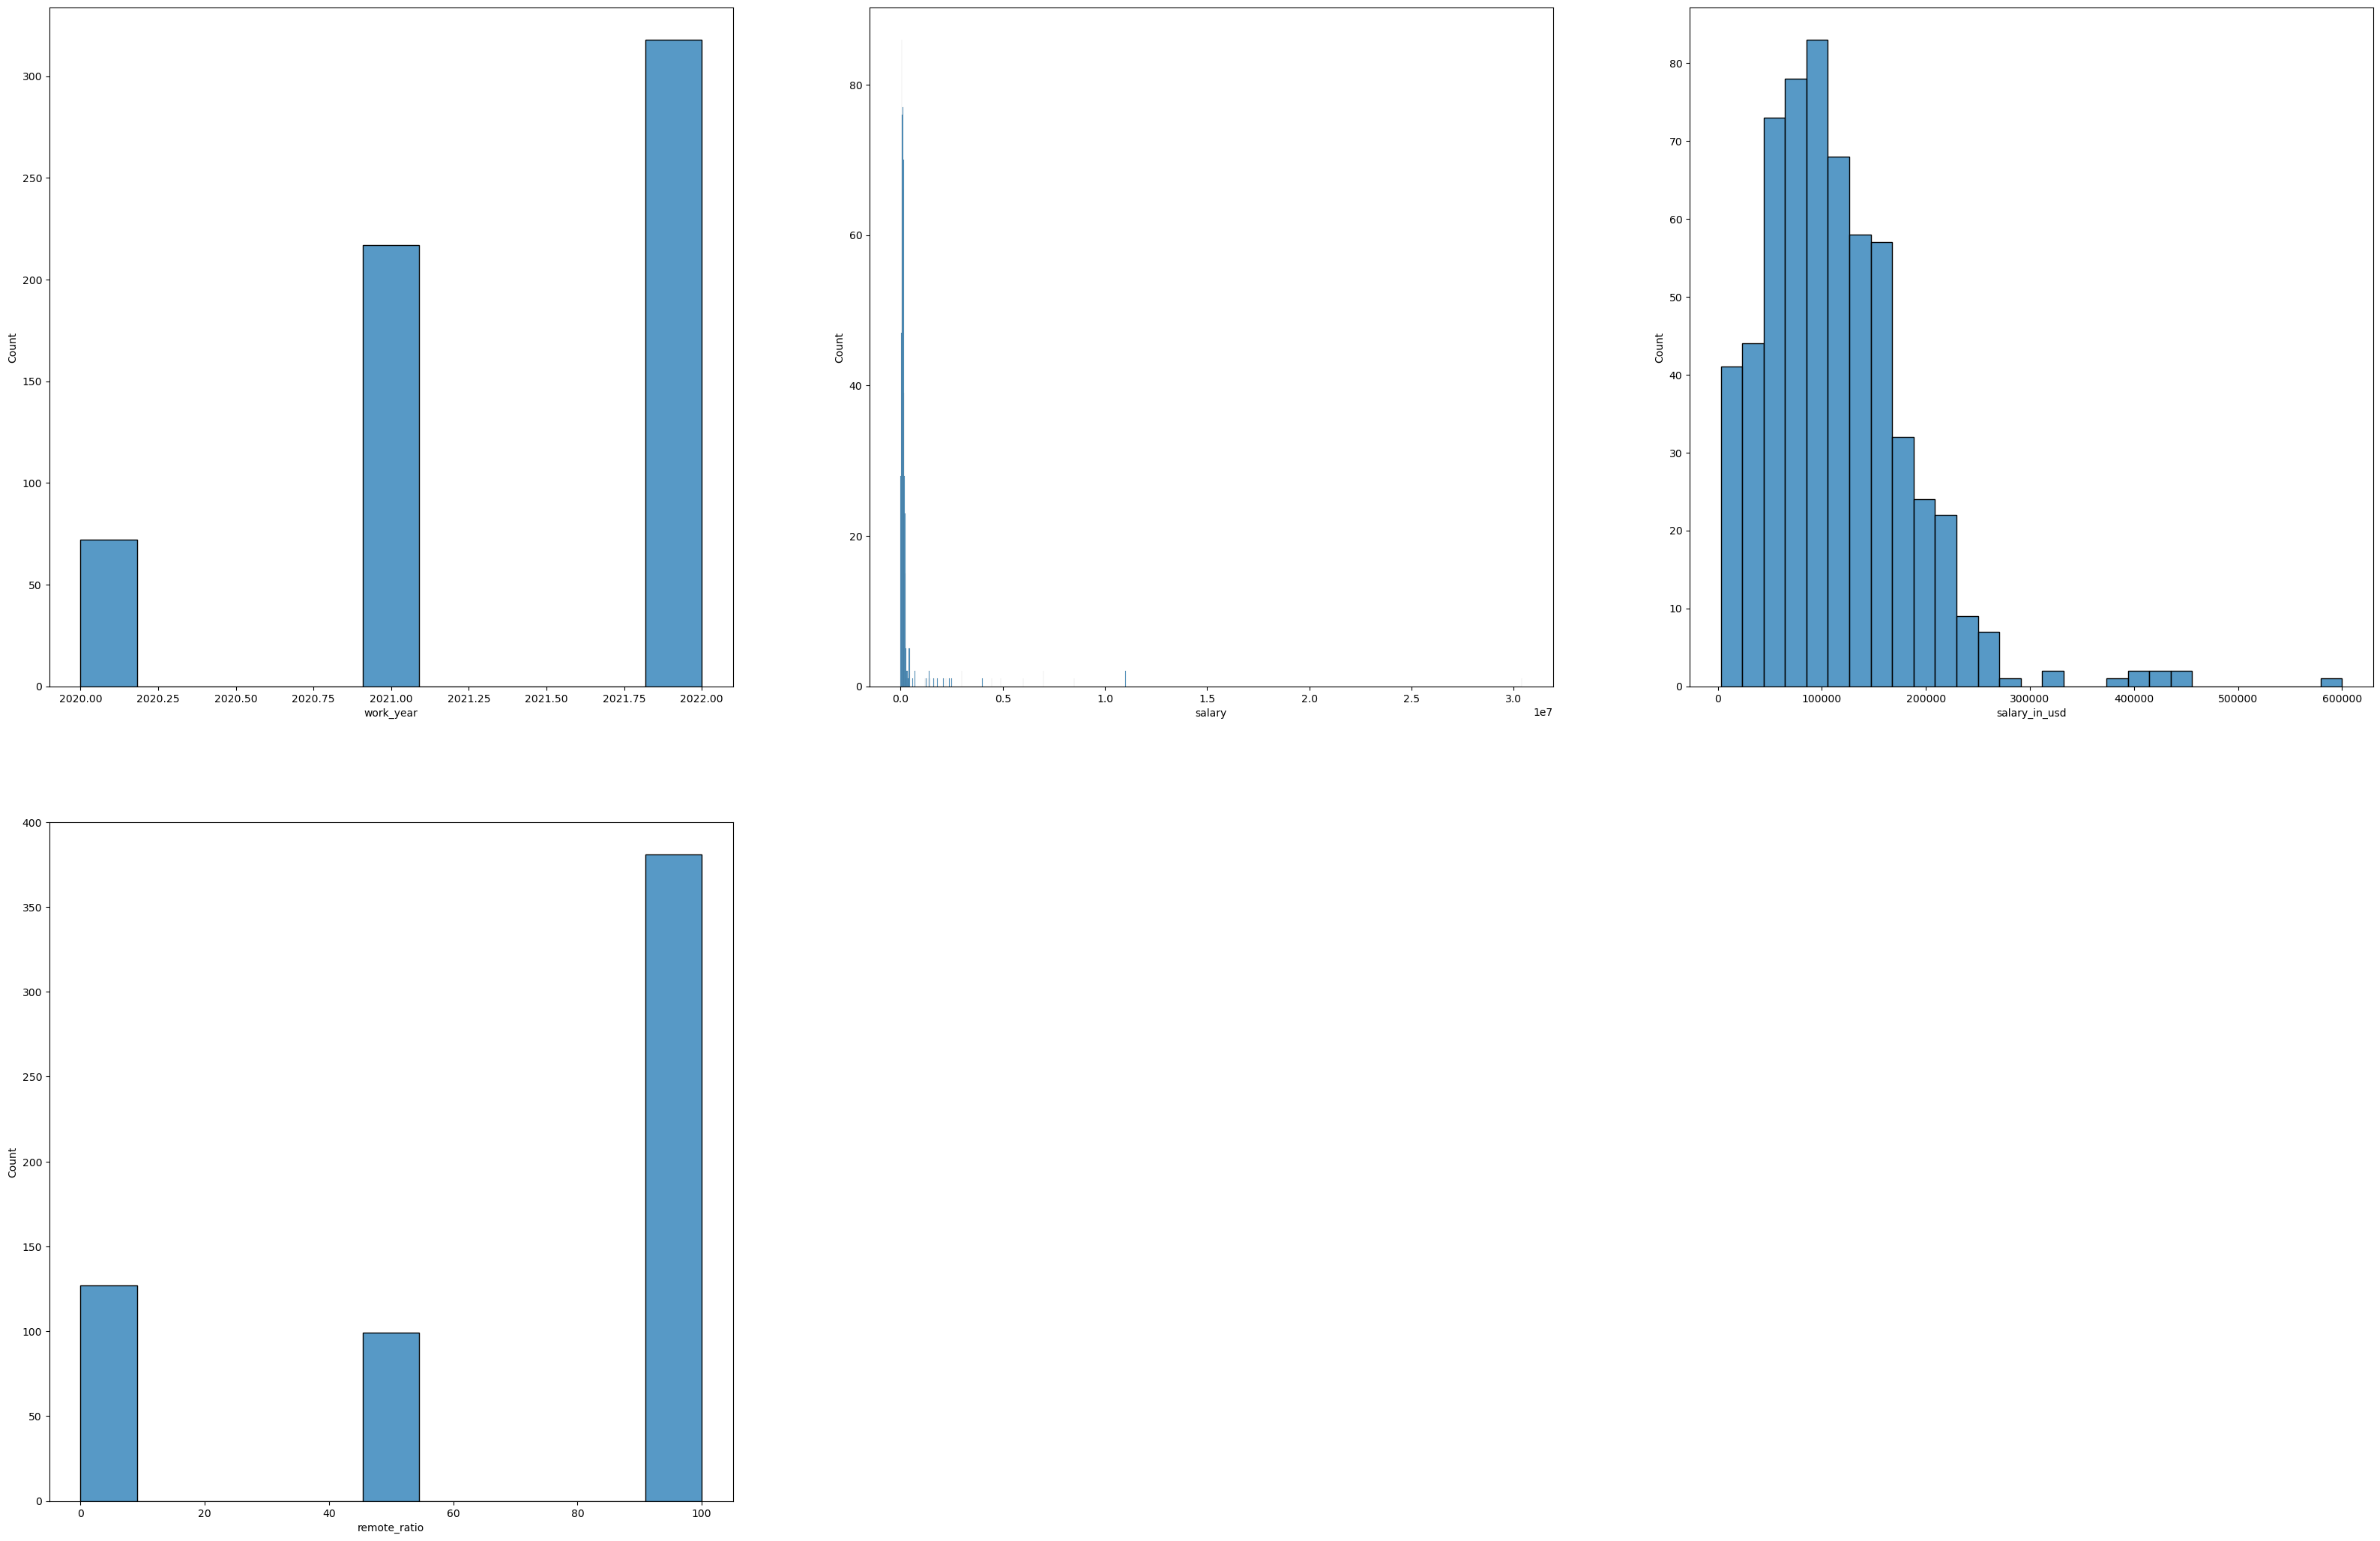

In [12]:
# Plot histograms for every numerical column
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
for i, column in enumerate(numericals.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numericals[column]);

Check the categorical variables visually

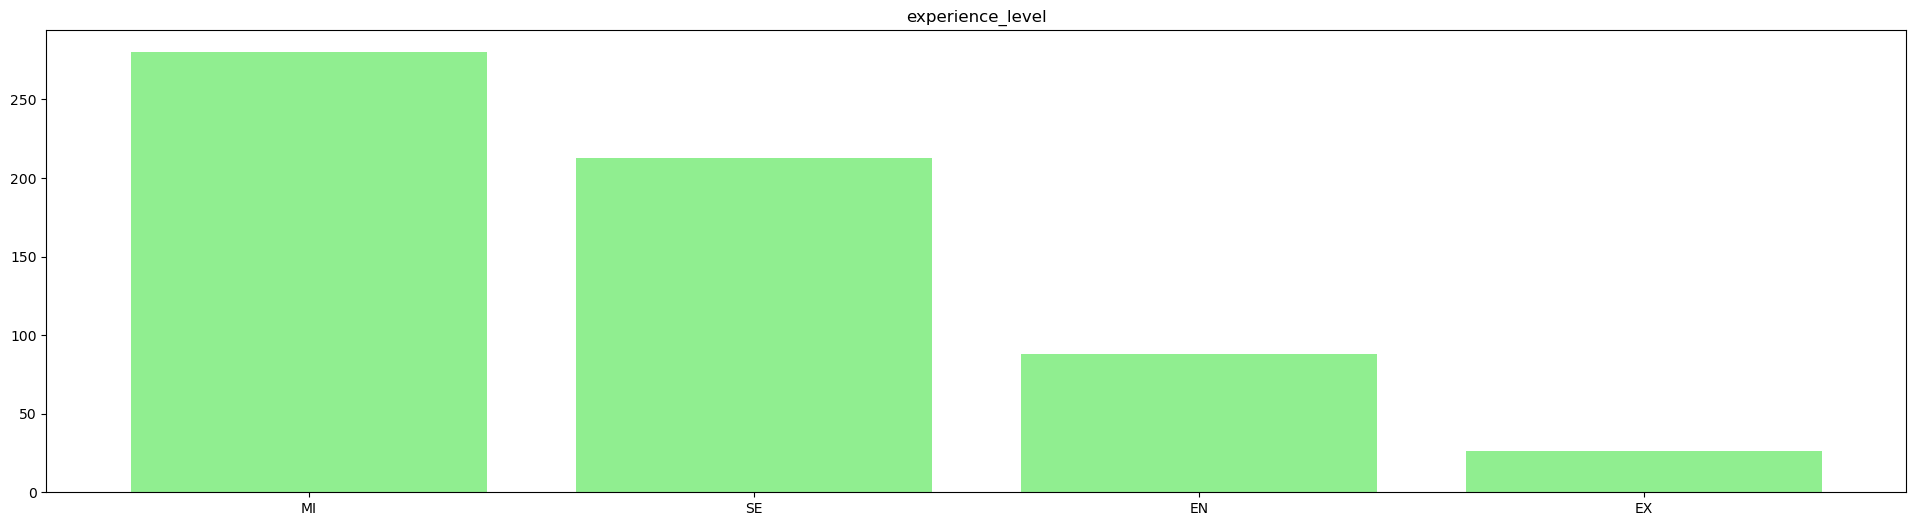

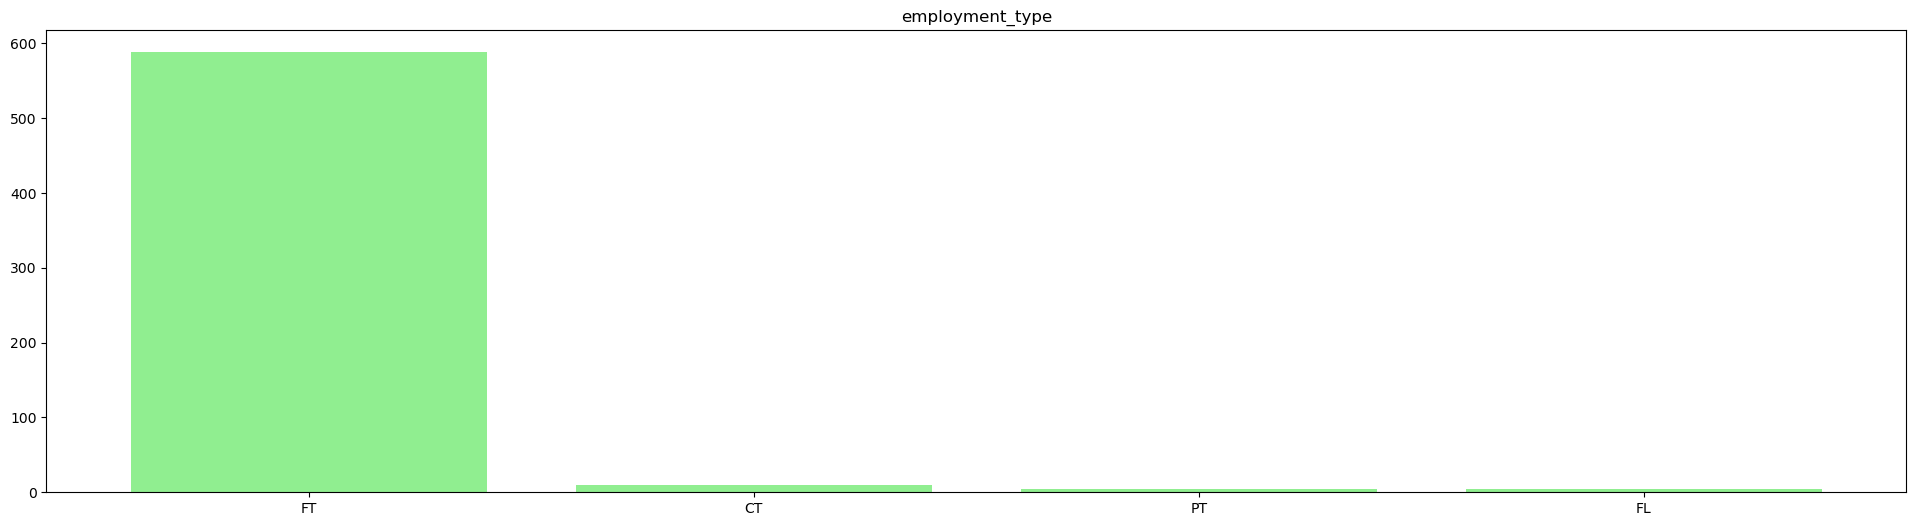

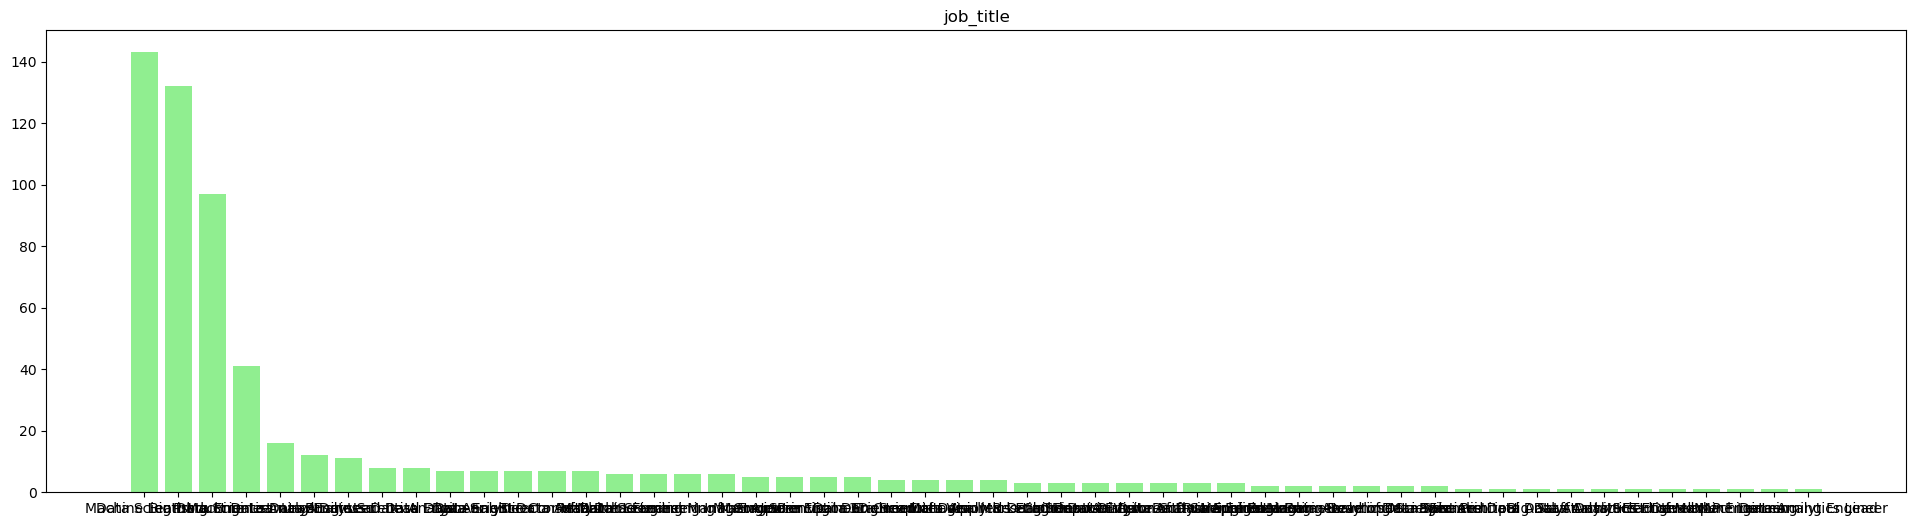

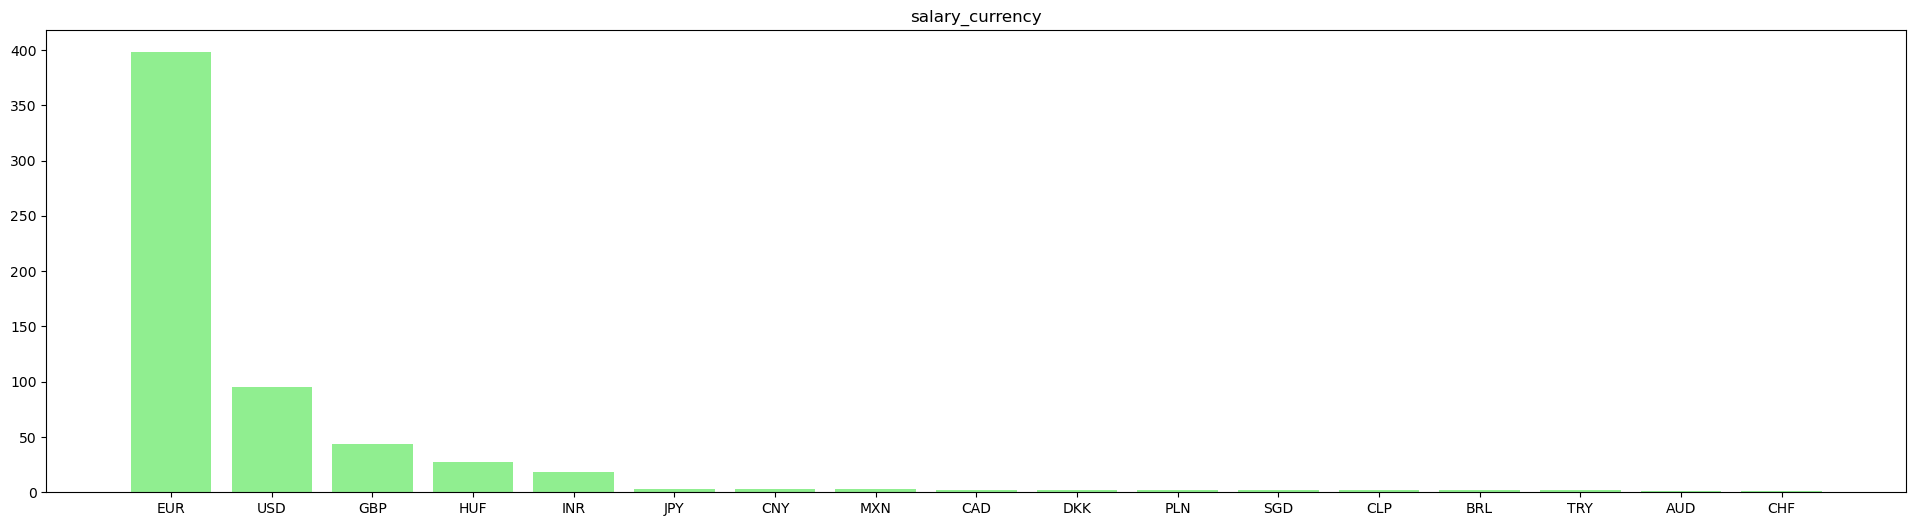

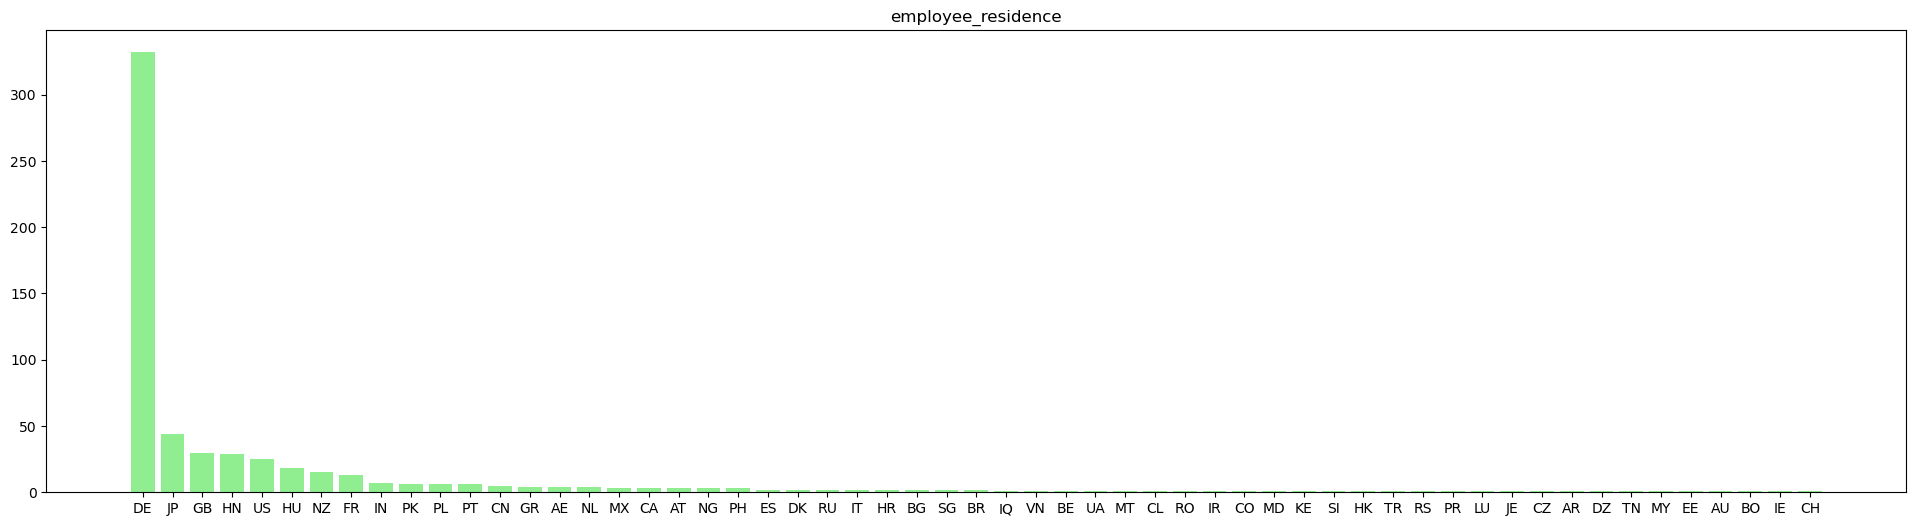

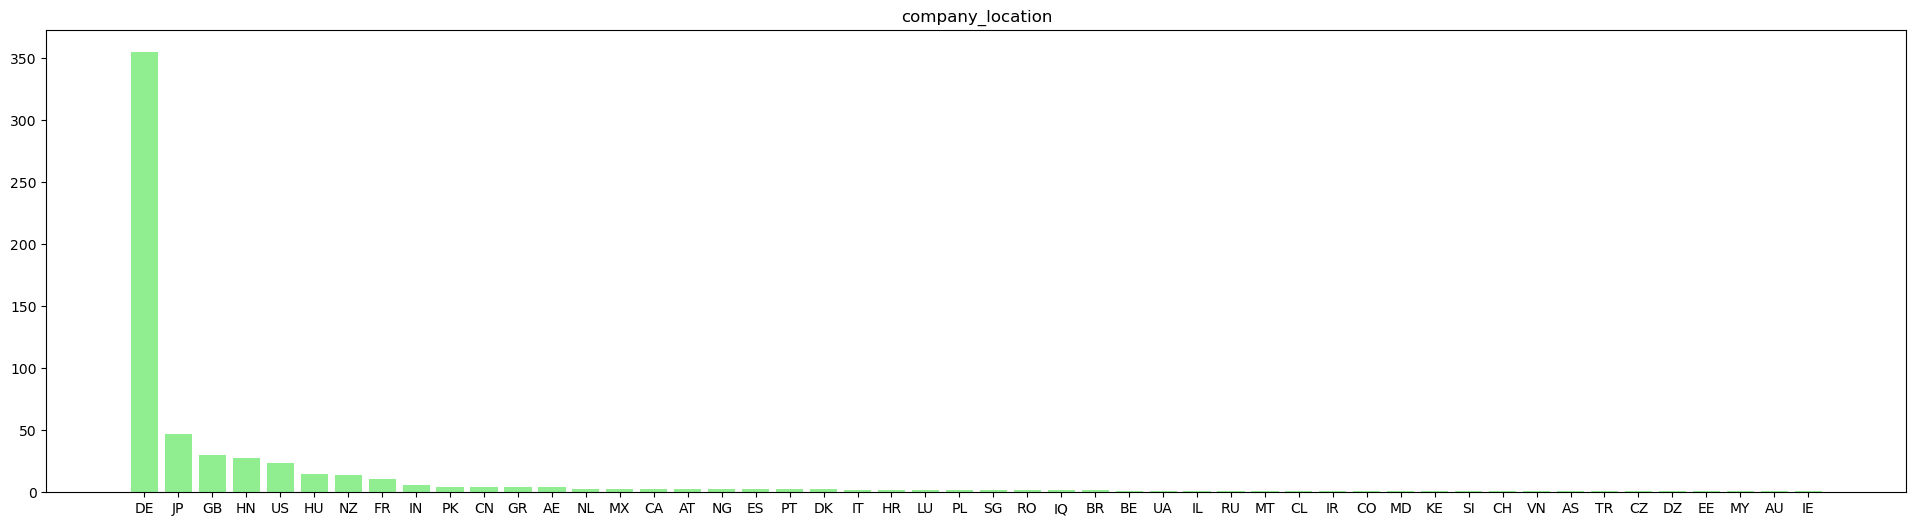

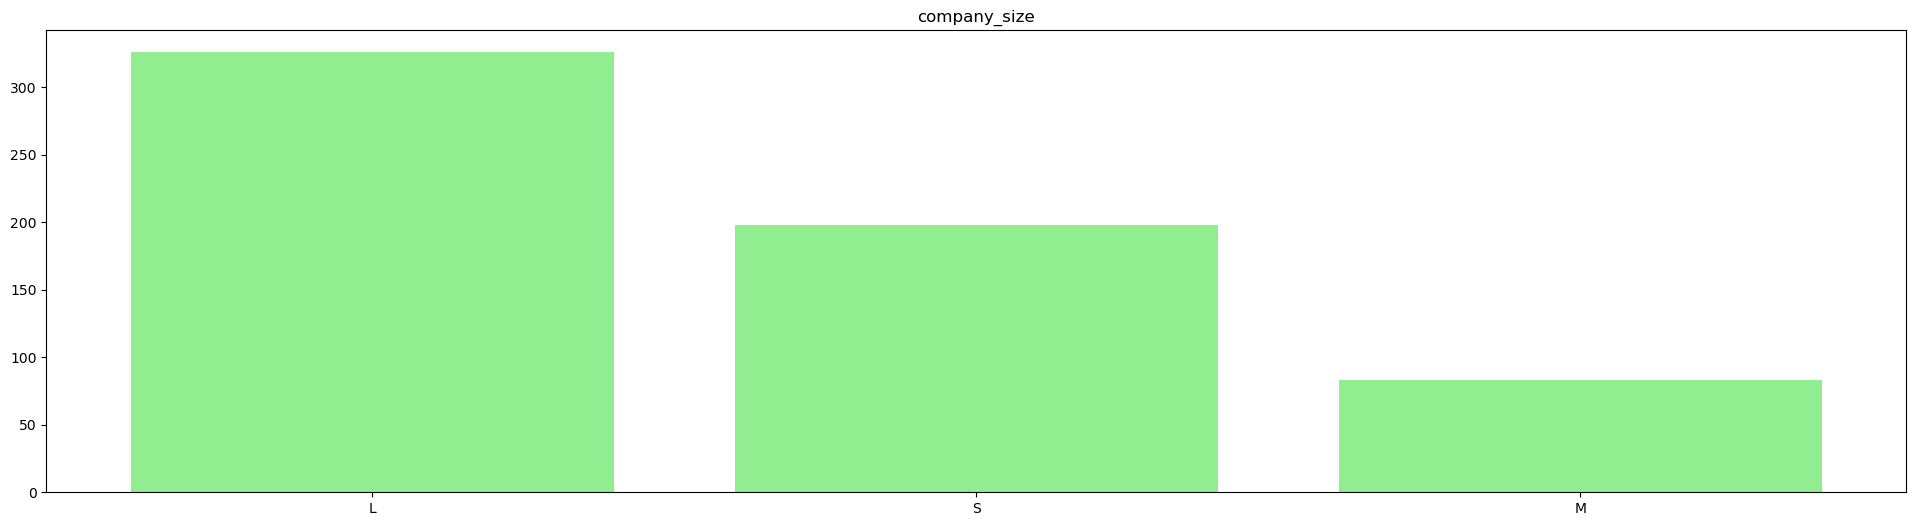

In [29]:
for i in categoricals:
    plt.figure(figsize=(24,6))
    plt.bar(data[i].unique(),data[i].value_counts(),color="lightgreen")
    plt.title(i)
    plt.show();

Check for multicolinearity

C:\Users\duygu\AppData\Local\Temp\ipykernel_11372\2982590967.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


(4.5, -0.5)

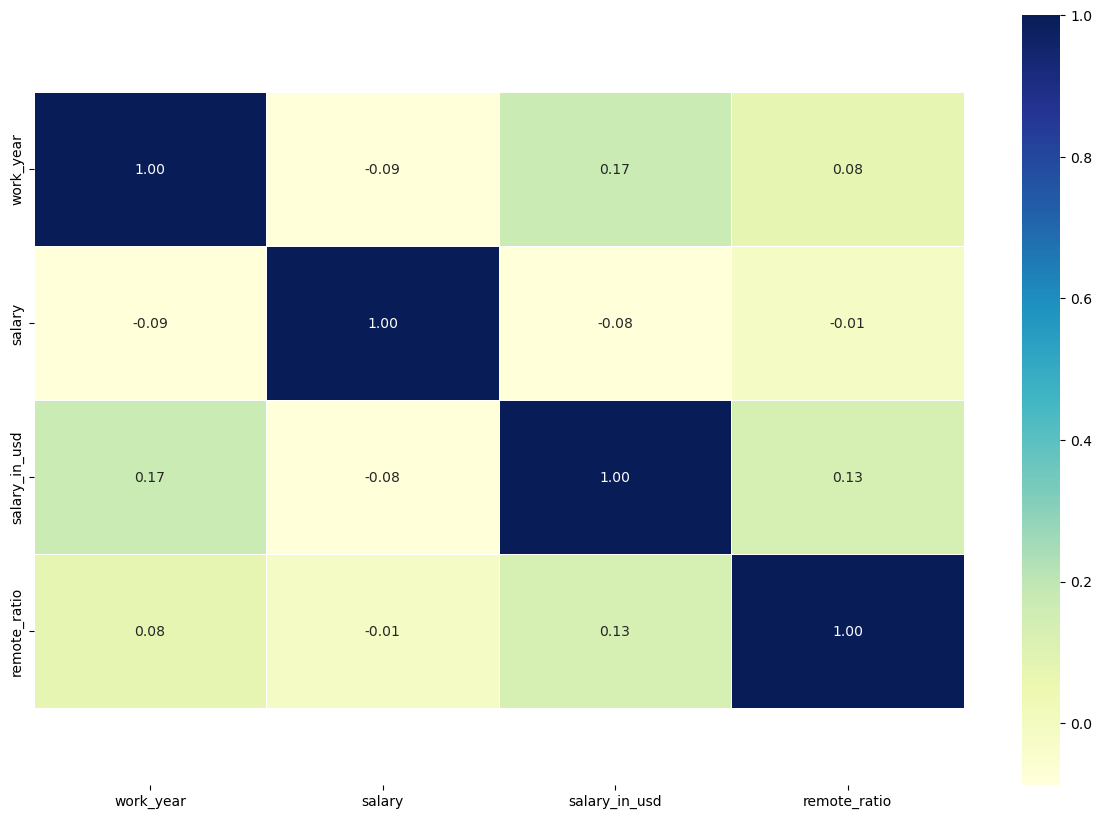

In [15]:
#plot correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Machine Learning Model

Now we will use the Scikit-Learn library and the workflow as follows, to get a model with a good performance.

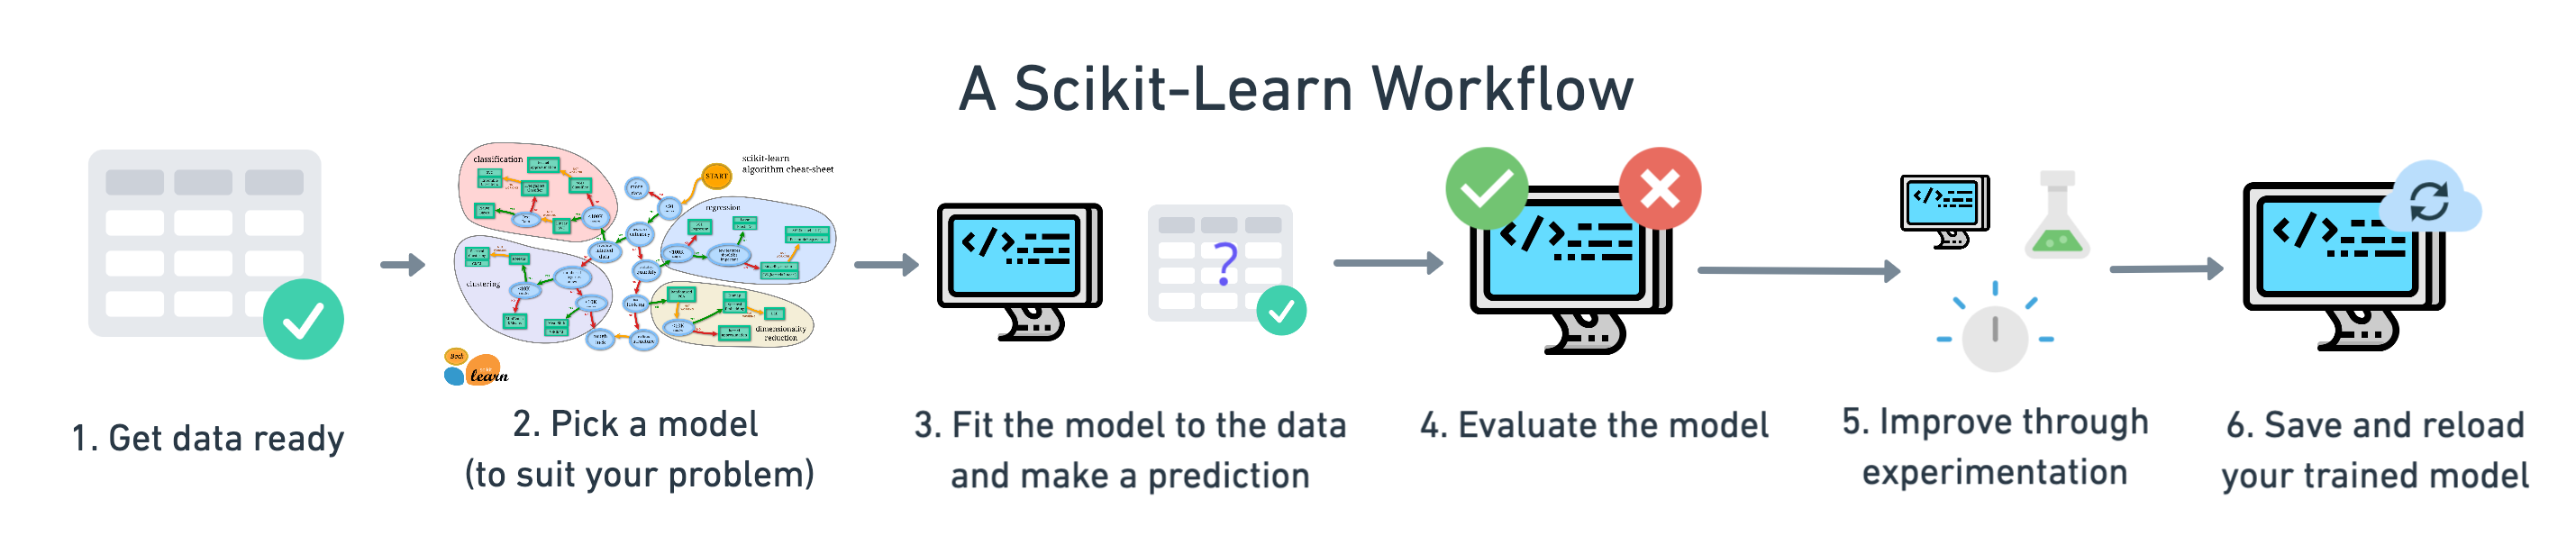

We have two questions to calculate the answers using a Machine Learning Model.

Q1- Which company_location has the lowest salary?

Q2- Which job_title that has the highest salary

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [17]:
# Encode categorical columns
label_encoder = LabelEncoder()
data['job_title_encoded'] = label_encoder.fit_transform(data['job_title'])
data['company_location_encoded'] = label_encoder.fit_transform(data['company_location'])

# Separate features and target variable
X = data[['job_title_encoded', 'company_location_encoded']]
y = data['salary_in_usd']

In [18]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [19]:
data['predicted_salary'] = model.predict(X)

In [20]:
lowest_salary_location = data.loc[data['predicted_salary'].idxmin(), 'company_location']

In [21]:
highest_salary_title = data.loc[data['predicted_salary'].idxmax(), 'job_title']

In [22]:
print("Company location with the lowest salary:", lowest_salary_location)
print("Job title with the highest salary:", highest_salary_title)

Company location with the lowest salary: IN
Job title with the highest salary: Principal Data Engineer
